In [27]:
%load_ext autoreload
%autoreload 2

In [28]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import utilities as u
# from utilities.model import a
# from utilities.configs import a
# from utilities.data import dataset_count
# from utilities.stats import a

In [29]:
training, validation = u.data.import_datasets()

Found 17728 files belonging to 14 classes.
Using 15956 files for training.
Found 17728 files belonging to 14 classes.
Using 1772 files for validation.


In [30]:
def make_base(input_Shape):
    # Base
    base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=input_Shape,
    include_top=False)  # Do not include the ImageNet classifier at the top.

    base_model.trainable = False

    return base_model

In [31]:
def make_model(input_shape, num_classes):
    base_model = make_base(input_shape)

    inputs = tf.keras.Input(shape=input_shape)

    #x = u.model.augmentation_layers.data_augmentation(inputs)
    x = inputs

    x = tf.keras.layers.Rescaling(1./255)(x)

    x = base_model(x, training=False)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

In [32]:
model = make_model(u.data.size_add_channels(u.configs.IMG_SIZE), len(u.configs.labels))

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 14)                28686     
                                                                 
Total params: 20,890,166
Trainable params: 28,686
Non-trainable params: 20,861,480
____________________________________________

In [34]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

Total count: 17728
Apple count: 988
Blueberry count: 467
Cherry count: 583
Corn count: 1206
Grape count: 1458
Orange count: 1748
Peach count: 977
Pepper count: 765
Potato count: 716
Raspberry count: 264
Soybean count: 1616
Squash count: 574
Strawberry count: 673
Tomato count: 5693


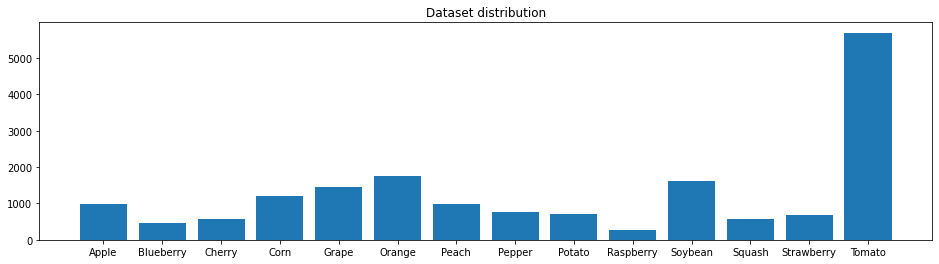

{'Apple': 988,
 'Blueberry': 467,
 'Cherry': 583,
 'Corn': 1206,
 'Grape': 1458,
 'Orange': 1748,
 'Peach': 977,
 'Pepper': 765,
 'Potato': 716,
 'Raspberry': 264,
 'Soybean': 1616,
 'Squash': 574,
 'Strawberry': 673,
 'Tomato': 5693}

In [35]:
u.stats.dataset_count()

Total count: 17728
Apple count: 988
Blueberry count: 467
Cherry count: 583
Corn count: 1206
Grape count: 1458
Orange count: 1748
Peach count: 977
Pepper count: 765
Potato count: 716
Raspberry count: 264
Soybean count: 1616
Squash count: 574
Strawberry count: 673
Tomato count: 5693


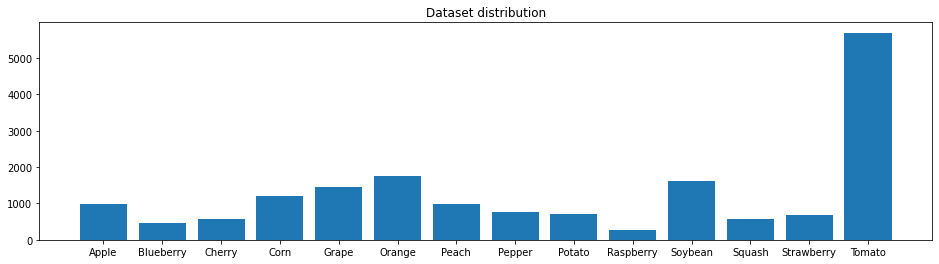

Epoch 1/25
125/125 [==============================] - ETA: 0s - loss: 0.8978 - accuracy: 0.5791INFO:tensorflow:Assets written to: ./checkpoints\save_at_1\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 77s 547ms/step - loss: 0.8978 - accuracy: 0.5791 - val_loss: 0.1269 - val_accuracy: 0.8267


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/25
125/125 [==============================] - ETA: 0s - loss: 0.4535 - accuracy: 0.8553INFO:tensorflow:Assets written to: ./checkpoints\save_at_2\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 64s 504ms/step - loss: 0.4535 - accuracy: 0.8553 - val_loss: 0.0870 - val_accuracy: 0.8911


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/25
125/125 [==============================] - ETA: 0s - loss: 0.3339 - accuracy: 0.8952INFO:tensorflow:Assets written to: ./checkpoints\save_at_3\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 65s 515ms/step - loss: 0.3339 - accuracy: 0.8952 - val_loss: 0.0693 - val_accuracy: 0.9159


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 4/25
125/125 [==============================] - ETA: 0s - loss: 0.2732 - accuracy: 0.9121INFO:tensorflow:Assets written to: ./checkpoints\save_at_4\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


125/125 [==============================] - 66s 524ms/step - loss: 0.2732 - accuracy: 0.9121 - val_loss: 0.0587 - val_accuracy: 0.9295
Epoch 5/25
125/125 [==============================] - ETA: 0s - loss: 0.2349 - accuracy: 0.9243INFO:tensorflow:Assets written to: ./checkpoints\save_at_5\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 68s 539ms/step - loss: 0.2349 - accuracy: 0.9243 - val_loss: 0.0533 - val_accuracy: 0.9328


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 6/25
125/125 [==============================] - ETA: 0s - loss: 0.2081 - accuracy: 0.9309INFO:tensorflow:Assets written to: ./checkpoints\save_at_6\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 65s 512ms/step - loss: 0.2081 - accuracy: 0.9309 - val_loss: 0.0480 - val_accuracy: 0.9385


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 7/25
125/125 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.9377INFO:tensorflow:Assets written to: ./checkpoints\save_at_7\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 64s 511ms/step - loss: 0.1878 - accuracy: 0.9377 - val_loss: 0.0440 - val_accuracy: 0.9436


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 8/25
125/125 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.9429INFO:tensorflow:Assets written to: ./checkpoints\save_at_8\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 65s 517ms/step - loss: 0.1717 - accuracy: 0.9429 - val_loss: 0.0414 - val_accuracy: 0.9419


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 9/25
125/125 [==============================] - ETA: 0s - loss: 0.1592 - accuracy: 0.9464INFO:tensorflow:Assets written to: ./checkpoints\save_at_9\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 66s 522ms/step - loss: 0.1592 - accuracy: 0.9464 - val_loss: 0.0390 - val_accuracy: 0.9447


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 10/25
125/125 [==============================] - ETA: 0s - loss: 0.1480 - accuracy: 0.9504INFO:tensorflow:Assets written to: ./checkpoints\save_at_10\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 63s 501ms/step - loss: 0.1480 - accuracy: 0.9504 - val_loss: 0.0358 - val_accuracy: 0.9543


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 11/25
125/125 [==============================] - ETA: 0s - loss: 0.1385 - accuracy: 0.9532INFO:tensorflow:Assets written to: ./checkpoints\save_at_11\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 64s 504ms/step - loss: 0.1385 - accuracy: 0.9532 - val_loss: 0.0345 - val_accuracy: 0.9537


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 12/25
125/125 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.9561INFO:tensorflow:Assets written to: ./checkpoints\save_at_12\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 65s 516ms/step - loss: 0.1303 - accuracy: 0.9561 - val_loss: 0.0334 - val_accuracy: 0.9549


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 13/25
125/125 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.9578INFO:tensorflow:Assets written to: ./checkpoints\save_at_13\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 66s 524ms/step - loss: 0.1233 - accuracy: 0.9578 - val_loss: 0.0316 - val_accuracy: 0.9582


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 14/25
125/125 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 0.9610INFO:tensorflow:Assets written to: ./checkpoints\save_at_14\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 65s 517ms/step - loss: 0.1168 - accuracy: 0.9610 - val_loss: 0.0302 - val_accuracy: 0.9611


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 15/25
125/125 [==============================] - ETA: 0s - loss: 0.1111 - accuracy: 0.9631INFO:tensorflow:Assets written to: ./checkpoints\save_at_15\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


125/125 [==============================] - 68s 535ms/step - loss: 0.1111 - accuracy: 0.9631 - val_loss: 0.0290 - val_accuracy: 0.9644
Epoch 16/25
125/125 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9648INFO:tensorflow:Assets written to: ./checkpoints\save_at_16\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 65s 517ms/step - loss: 0.1059 - accuracy: 0.9648 - val_loss: 0.0280 - val_accuracy: 0.9644


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 17/25
125/125 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9663INFO:tensorflow:Assets written to: ./checkpoints\save_at_17\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 67s 534ms/step - loss: 0.1014 - accuracy: 0.9663 - val_loss: 0.0281 - val_accuracy: 0.9628


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 18/25
125/125 [==============================] - ETA: 0s - loss: 0.0969 - accuracy: 0.9682INFO:tensorflow:Assets written to: ./checkpoints\save_at_18\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 66s 521ms/step - loss: 0.0969 - accuracy: 0.9682 - val_loss: 0.0272 - val_accuracy: 0.9650
Epoch 19/25
125/125 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9690INFO:tensorflow:Assets written to: ./checkpoints\save_at_19\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 68s 539ms/step - loss: 0.0929 - accuracy: 0.9690 - val_loss: 0.0261 - val_accuracy: 0.9678


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 20/25
125/125 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9709INFO:tensorflow:Assets written to: ./checkpoints\save_at_20\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


125/125 [==============================] - 67s 533ms/step - loss: 0.0894 - accuracy: 0.9709 - val_loss: 0.0259 - val_accuracy: 0.9667
Epoch 21/25
125/125 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9720INFO:tensorflow:Assets written to: ./checkpoints\save_at_21\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 74s 584ms/step - loss: 0.0859 - accuracy: 0.9720 - val_loss: 0.0250 - val_accuracy: 0.9684


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 22/25
125/125 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9732INFO:tensorflow:Assets written to: ./checkpoints\save_at_22\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


125/125 [==============================] - 68s 539ms/step - loss: 0.0826 - accuracy: 0.9732 - val_loss: 0.0231 - val_accuracy: 0.9723
Epoch 23/25
125/125 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9738INFO:tensorflow:Assets written to: ./checkpoints\save_at_23\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


125/125 [==============================] - 67s 533ms/step - loss: 0.0798 - accuracy: 0.9738 - val_loss: 0.0236 - val_accuracy: 0.9701
Epoch 24/25
125/125 [==============================] - ETA: 0s - loss: 0.0769 - accuracy: 0.9757INFO:tensorflow:Assets written to: ./checkpoints\save_at_24\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


125/125 [==============================] - 66s 526ms/step - loss: 0.0769 - accuracy: 0.9757 - val_loss: 0.0224 - val_accuracy: 0.9752
Epoch 25/25
125/125 [==============================] - ETA: 0s - loss: 0.0745 - accuracy: 0.9761INFO:tensorflow:Assets written to: ./checkpoints\save_at_25\assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 67s 527ms/step - loss: 0.0745 - accuracy: 0.9761 - val_loss: 0.0226 - val_accuracy: 0.9718


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [36]:

model.fit(
    training,
    epochs=u.configs.EPOCHS,
    validation_data=validation,
    class_weight=u.model.weights(),
    callbacks=u.model.early_stopping_callbacks(),
)

In [37]:
model.save('./models/transfer/')

INFO:tensorflow:Assets written to: ./models/transfer/assets


C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Xxenr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


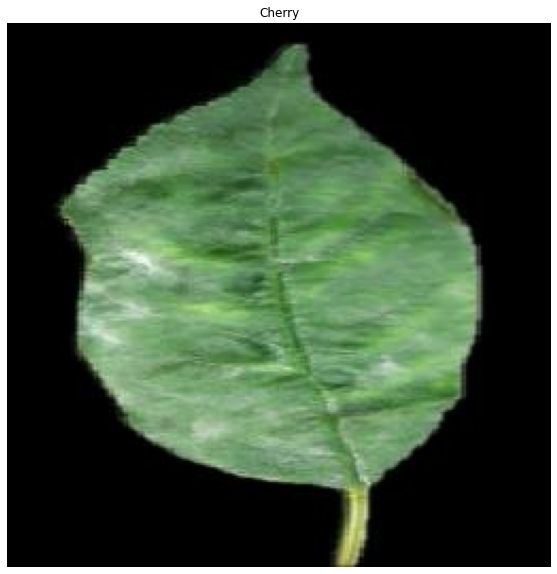

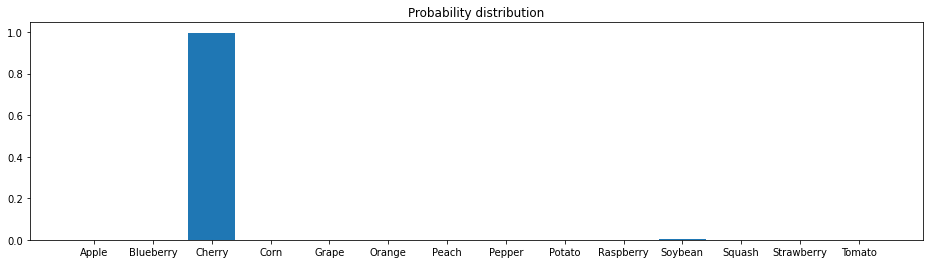

In [61]:
img = u.data.get_first_of_type(validation, "Cherry")
img = (np.expand_dims(img,0))

# print(img.shape)

predictions_single = model.predict(img)
u.stats.dataset_probabilities(predictions_single)